In [1]:
import numpy as np
import os
import yfinance as yf
import pandas as pd
from pathlib import Path
from classes import Portfolio
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from asset_database import DICT_ASSET_INFO
from tools import get_value,plot_actual_postion,plot_earnings_in_last_months,get_position,compute_position
from historico_tesouro.tresury_history import DICT_TRESURY_HISTORY
from transactions import GLOBAL_DATA_BASE

current_path = Path.cwd()

In [2]:
portfolio_luiz = Portfolio(GLOBAL_DATA_BASE[GLOBAL_DATA_BASE["owner"]=="Luiz"].drop("owner",axis=1))
portfolio_luciane = Portfolio(GLOBAL_DATA_BASE[GLOBAL_DATA_BASE["owner"]=="Luciane"].drop("owner",axis=1))

In [3]:
# plot_earnings_in_last_months(portfolio_luiz.data_base,delta_months=4)

In [4]:
# position,old = compute_position(portfolio_luiz.data_base)
# plot_actual_postion(position)

In [11]:
df = portfolio_luciane.data_base[portfolio_luciane.data_base["class"] != "Tesouro"]

In [12]:
dividends_data_base = pd.DataFrame(columns=["date","ticker","dividend","amount","total_dividend"])

for ticker in df["ticker"].unique():

    dividend_data = yf.Ticker(DICT_ASSET_INFO[ticker].ticker).dividends
    for dividend_date,dividend in zip(dividend_data.index,dividend_data):
        date = pd.Timestamp(dividend_date.year,dividend_date.month,dividend_date.day)
        position_in_date = get_position(
            data_base=df,
            ticker=ticker,
            date=date,
        )[1]
        if position_in_date > 0:

            dict_dividend = {
                "date":dividend_date,
                "ticker":ticker,
                "dividend":dividend,
                "amount":position_in_date,
                "total_dividend":position_in_date * dividend,
            }

            if DICT_ASSET_INFO[ticker].asset_class == "USD":

                earlier = date - pd.Timedelta(days=7)
                usd_brl = yf.Ticker("BRL%3DX").history(start=earlier,end=date)[["Close"]]
                usd_brl = usd_brl.sort_index(ascending=False).iloc[0].values[0]
                dict_dividend["dividend"] = dict_dividend["dividend"] * usd_brl
                dict_dividend["total_dividend"] = dict_dividend["total_dividend"] * usd_brl

            dividends_data_base.loc[len(dividends_data_base)] = dict_dividend

dividends_data_base = dividends_data_base.sort_values(by="date",ignore_index=True)

In [13]:
delta_months = 12

list_dates = [
    pd.Timestamp(2024,pd.Timestamp.today().month,1,tz='America/Sao_Paulo') - relativedelta(months=delta_months-i-1) - pd.Timedelta(days=1)
    for i in range(delta_months)]
list_dates.append(pd.Timestamp.today(tz='America/Sao_Paulo'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


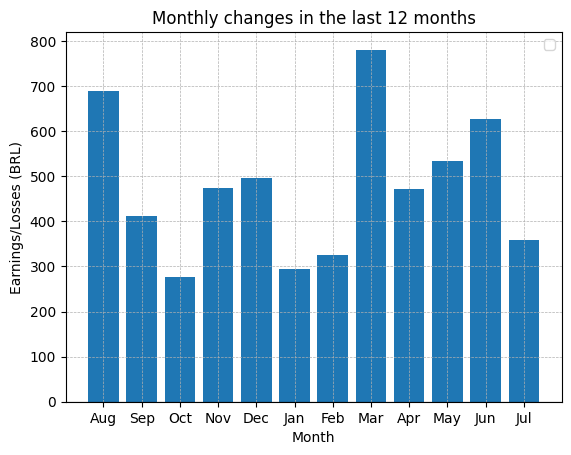

In [14]:
month_names = {
    1:'Jan', 
    2:'Feb', 
    3:'Mar', 
    4:'Apr', 
    5:'May', 
    6:'Jun', 
    7:'Jul', 
    8:'Aug', 
    9:'Sep', 
    10:'Oct', 
    11:'Nov', 
    12:'Dec',
}

x = np.arange(len(list_dates)-1)

# Create the plot
fig, ax = plt.subplots()

bars = ax.bar(
    [month_names[list_dates[i+1].month] for i in range(len(list_dates)-1)],
    [dividends_data_base[
        (dividends_data_base["date"] > list_dates[i]) & 
        (dividends_data_base["date"] <= list_dates[i+1])
    ]["total_dividend"].sum() for i in range(len(list_dates)-1)], 
    # color=[class_colors[_class] for x in earnings_per_month],
    # label=f"{_class}"
)

# Draw a central line at y=0
ax.axhline(0, color='black', linewidth=0.8)

# Add labels and title
# ax.set_xticks(x + bar_width * (len(class_colors) - 1) / 2)
# ax.set_xticklabels([month_names[list_dates[i+1].month] for i in range(len(list_dates)-1)])
ax.set_ylabel('Earnings/Losses (BRL)')
ax.set_xlabel('Month')
ax.set_title(f'Monthly changes in the last {delta_months} months')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

In [49]:
[month_names[list_dates[i+1].month] for i in range(len(list_dates)-1)]

['May', 'Jun', 'Jul']

In [31]:
list_dates[0].tzinfo = 

dividends_data_base["date"] < pd.Timestamp(list_dates[0],tzinfo=datetime(list_dates[0] tzinfo='America/Sao_Paulo'))

TypeError: function missing required argument 'year' (pos 1)

In [28]:
dividends_data_base["date"].loc[0]

Timestamp('2023-06-01 00:00:00-0300', tz='America/Sao_Paulo')

In [ ]:
delta_months = 6

list_dates = [
    datetime(2024,datetime.today().month,1) - relativedelta(months=delta_months-i-1)
    for i in range(delta_months)]

class_colors = {
    "total":"y",
    'USD':'r',
    'Tesouro':'g',
    'Ação': 'b',
    'FII': 'm',
}

month_names = {
    1:'Jan', 
    2:'Feb', 
    3:'Mar', 
    4:'Apr', 
    5:'May', 
    6:'Jun', 
    7:'Jul', 
    8:'Aug', 
    9:'Sep', 
    10:'Oct', 
    11:'Nov', 
    12:'Dec',
}

# bar_width = 0.18
x = np.arange(len(list_dates))

# Create the plot
fig, ax = plt.subplots()

for i,_class in enumerate(class_colors.keys()):
    if _class == "total":
        total_per_month = [dict_positions[date]["Total price"].sum() for date in dict_positions.keys()]     
        earnings_per_month = [total_per_month[i+1] - total_per_month[i] for i in range(len(total_per_month)-1)]
    else:
        total_per_month = [dict_positions[date][dict_positions[date]["Class"] == _class]["Total price"].sum() for date in dict_positions.keys()] 
        earnings_per_month = [total_per_month[i+1] - total_per_month[i] for i in range(len(total_per_month)-1)]

    bars = ax.bar(
        x + i * bar_width,
        earnings_per_month, 
        color=[class_colors[_class] for x in earnings_per_month],
        width=bar_width,
        label=f"{_class}"
    )

    # Draw a central line at y=0
    ax.axhline(0, color='black', linewidth=0.8)

    # Add labels and title
    ax.set_xticks(x + bar_width * (len(class_colors) - 1) / 2)
    ax.set_xticklabels([month_names[month_num.month] for month_num in list_dates])
    ax.set_ylabel('Earnings/Losses (BRL)')
    ax.set_xlabel('Month')
    ax.set_title(f'Monthly changes in the last {delta_months} months')
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()

TypeError: _AxesBase.set_figure() got an unexpected keyword argument 'figsize'

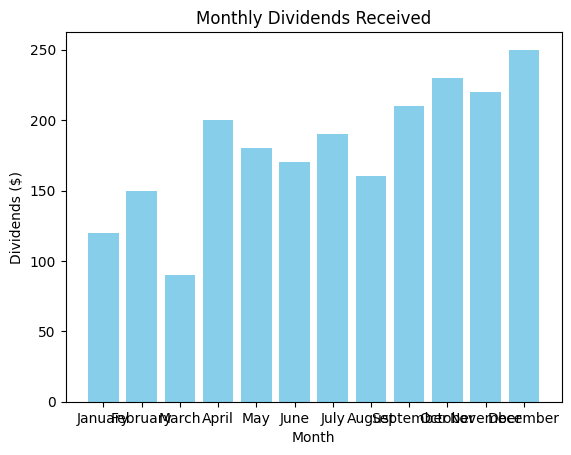

In [11]:
import matplotlib.pyplot as plt

# Example data
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
dividends = [120, 150, 90, 200, 180, 170, 190, 160, 210, 230, 220, 250]

# Create a bar chart
ax = plt.subplot()
# ax.figure()
ax.bar(months, dividends, color='skyblue')

# Add titles and labels
ax.set_title('Monthly Dividends Received')
ax.set_xlabel('Month')
ax.set_ylabel('Dividends ($)')
ax.set_figure(figsize=(10, 6))
# ax.xtiks(  rotation=45)  # Rotate month labels for better readability

# Show the plot
# ax.set_tight_layout()  # Adjust layout to make room for the rotated labels
plt.show()

In [5]:
import tkinter as tk

def on_click():
    portfolio_luciane.plot_actual_postion()

app = tk.Tk()
app.title("Simple Tkinter App")

label = tk.Label(app, text="Hello, Tkinter!")
label.pack()

button = tk.Button(app, text="Click Me", command=on_click)
button.pack()

app.mainloop()

KeyboardInterrupt: 

: 